# Problem Statement: 

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 

## Exercise:

Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

## Points to Remember:
•	There are no null values in the dataset. 
•	There may be some customers with no loan history. 
•	The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.
•	For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.
•	You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.  


## Importing all the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import cross_val_score,GridSearchCV, train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC 

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_confusion_matrix, plot_roc_curve

In [3]:
df = pd.read_csv('Data file.csv')
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,2016-07-25


#### We have imported the dataset and converted it into dataframe which helps in applying different techniques to the dataset and analyse the data easily.

## Exploratory Data Analysis.

#### Let analyze the datasets to summarize their main characteristics, and then explore the data using visual techniques. 
#### It is helps to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

In [4]:
#checking the overview information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [5]:
#checking if there are any null values present in the dataset
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [6]:
#Let us check the statistical summary of the dataframe. 
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,209593.0,104797.000000,60504.431823,1.000000,52399.000,104797.000000,157195.00,209593.000000
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,8112.343445,75696.082531,-48.000000,246.000,527.000000,982.00,999860.755168
daily_decr30,209593.0,5381.402289,9220.623400,-93.012667,42.440,1469.175667,7244.00,265926.000000
daily_decr90,209593.0,6082.515068,10918.812767,-93.012667,42.692,1500.000000,7802.79,320630.000000
rental30,209593.0,2692.581910,4308.586781,-23737.140000,280.420,1083.570000,3356.94,198926.110000
rental90,209593.0,3483.406534,5770.461279,-24720.580000,300.260,1334.000000,4201.79,200148.110000
last_rech_date_ma,209593.0,3755.847800,53905.892230,-29.000000,1.000,3.000000,7.00,998650.377733
last_rech_date_da,209593.0,3712.202921,53374.833430,-29.000000,0.000,0.000000,0.00,999171.809410
last_rech_amt_ma,209593.0,2064.452797,2370.786034,0.000000,770.000,1539.000000,2309.00,55000.000000


In [7]:
#checking the different coloumn names available in the dataset.
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [8]:
#let us have brief understanding of unique values present in the dataset.
for i in df.columns:
    print('Name of attribute:',i,'\n',df[i].value_counts())
    print('*'*80)

Name of attribute: Unnamed: 0 
 2049      1
23969     1
126359    1
103832    1
105881    1
         ..
57929     1
64074     1
62027     1
51788     1
2047      1
Name: Unnamed: 0, Length: 209593, dtype: int64
********************************************************************************
Name of attribute: label 
 1    183431
0     26162
Name: label, dtype: int64
********************************************************************************
Name of attribute: msisdn 
 47819I90840    7
04581I85330    7
94119I84456    6
30080I90588    6
43430I70786    6
              ..
61864I82735    1
37106I82739    1
12369I84458    1
88732I88650    1
39357I90848    1
Name: msisdn, Length: 186243, dtype: int64
********************************************************************************
Name of attribute: aon 
 95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
818222.402828      1
603666.669107      1
852238.900959     

## Observations:

#### 1. There are 209593 rows and 37 columns in the data sets which have different information in each attribute. There are no null values.
#### 2. Basically there are 2 type of observations made i.e, customer behavior for 30 days and 90 days. 
####  Two types of account held by customer main account, data account.
#### 3. Target feature 'Label' has unbalanced data, we need to treat the target variable using sampling technique.
#### 3. 'Unnamed: 0' attribute has all unique values as same as index columns  which has no importance for analysis.
#### 4. Approximately 90% of data in 'msisdn' has unique values, i.e, ID.
#### 5. 'payback30','payback90' has nearly 50% of the values having 0.
#### 6. More than 90% of 'last_rech_date_da', 'cnt_da_rech90 ','fr_da_rech90','medianamnt_loans30','medianamnt_loans90' has of values which is 0.
#### 7. 'pcircle' has only 1 unique value through out column and 'pdate' is a categorical column we can drop this column.

In [4]:
df.drop(columns=['Unnamed: 0','pcircle','pdate','msisdn'], inplace=True, axis=1)

## Let us analyse the relationship between the attributes using Visualization techniques

### Univaraiate Analysis

Univariate analysis explores each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values.

In [10]:
#Let us analyse target variable and check unique values and represent the values in form of pie chart
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

% of non defaulters anddefaulters: 
 [0.875177129007171, 0.12482287099282896]


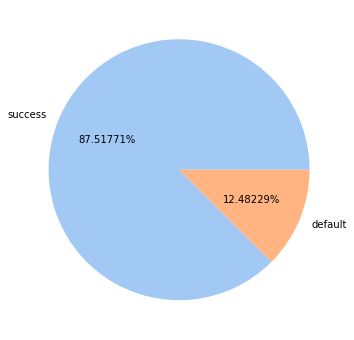

In [11]:
labels = ['success','default']
success = (df[df['label']==1].shape[0])/df.shape[0]
default = (df[df['label']==0].shape[0])/df.shape[0]
data= [success, default]
print("% of non defaulters anddefaulters: \n",data)
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=(8,6), facecolor='white')
plt.pie(data, labels = labels, colors = colors, autopct='%2.5f%%')
plt.show()

### There are 87.5% of non-defaulters and 12.5% of defaulter customers, the data is unbalanced we will use random oversampling technique to balance the target.
### Let us visualize all individual attributes with help of histogram plot and box plot to check how the data is distributed and if there are any outliers present in the data.

In [14]:
def graph(data,col):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    sns.distplot(data[col],color='blue')
    plt.subplot(1,2,2)
    sns.boxplot(data[col],color='red')
    plt.show()
    

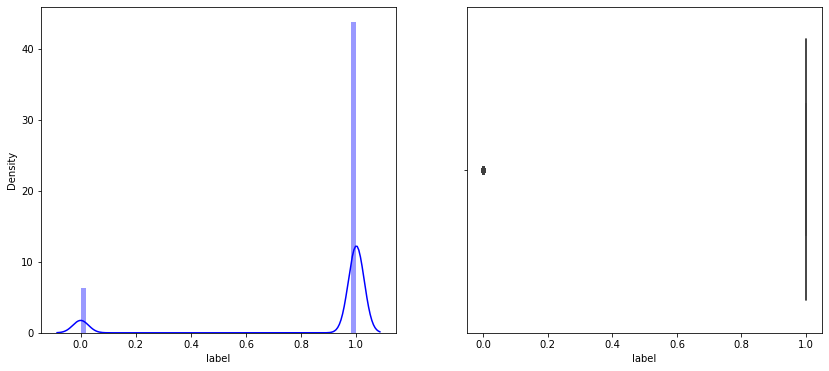

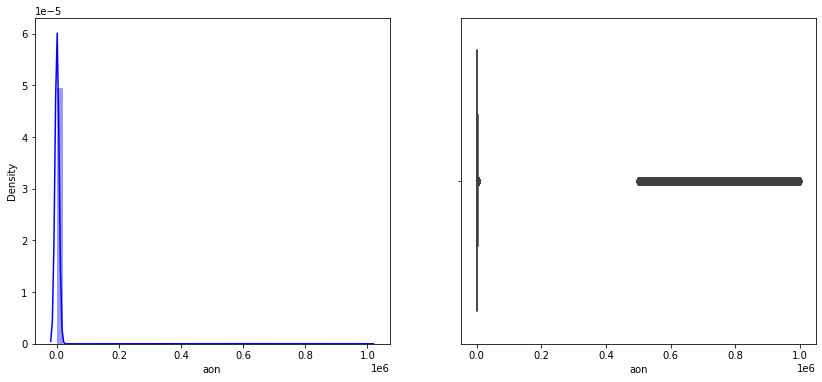

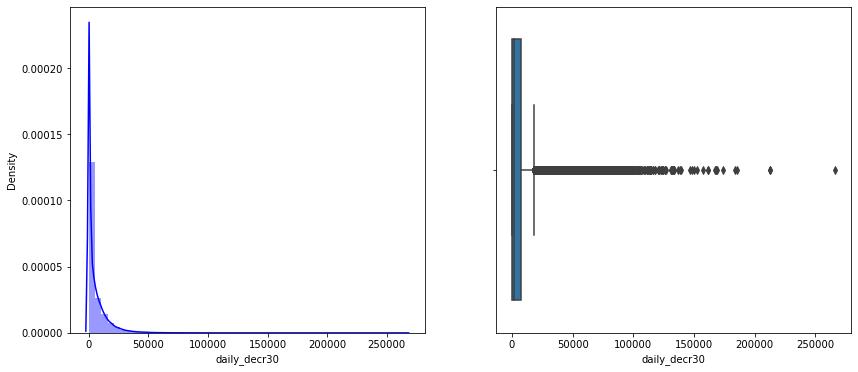

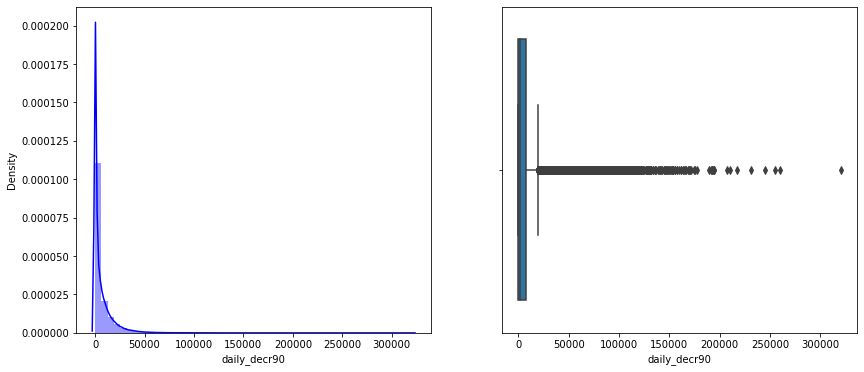

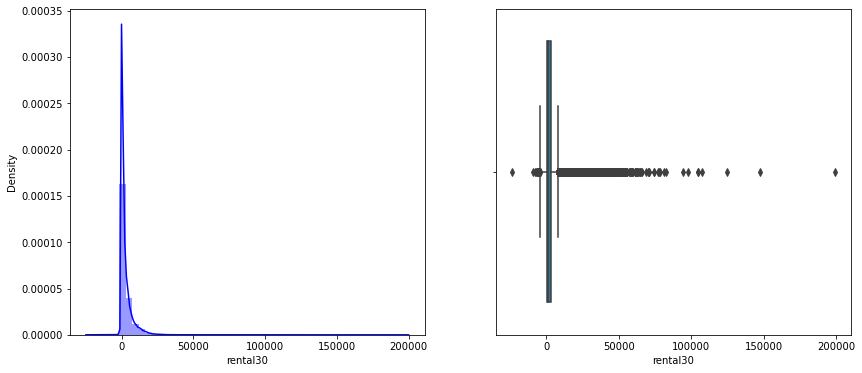

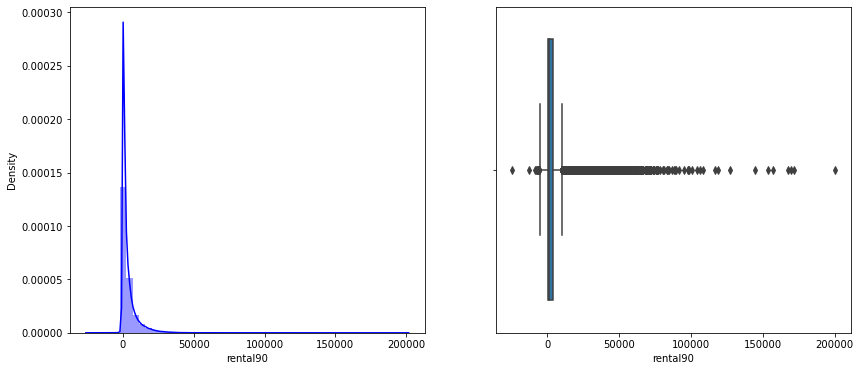

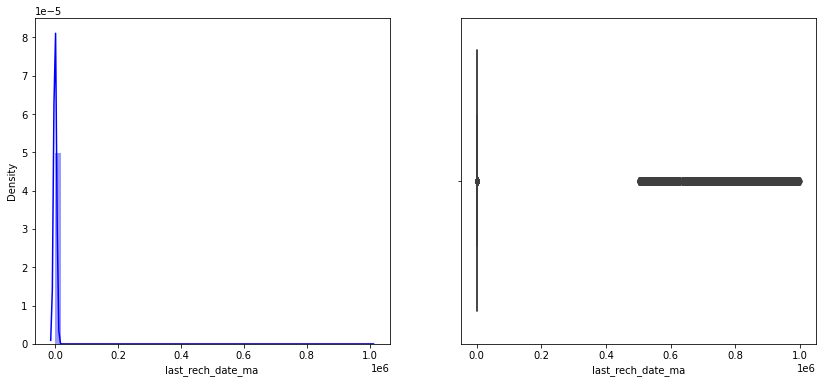

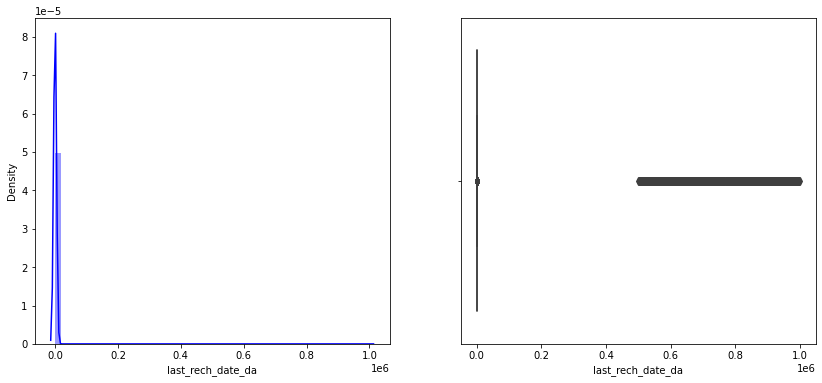

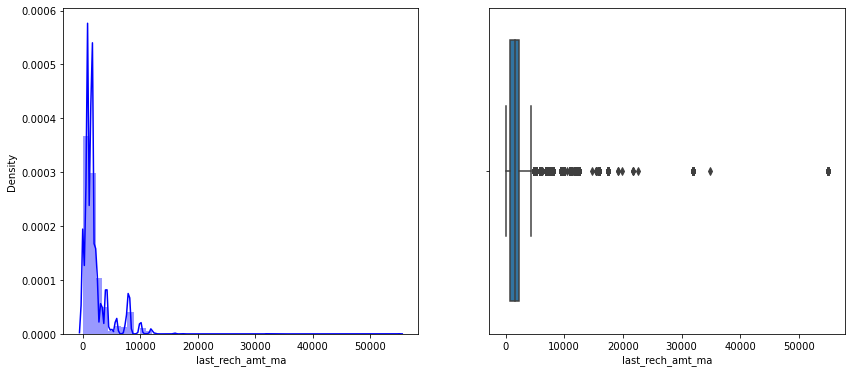

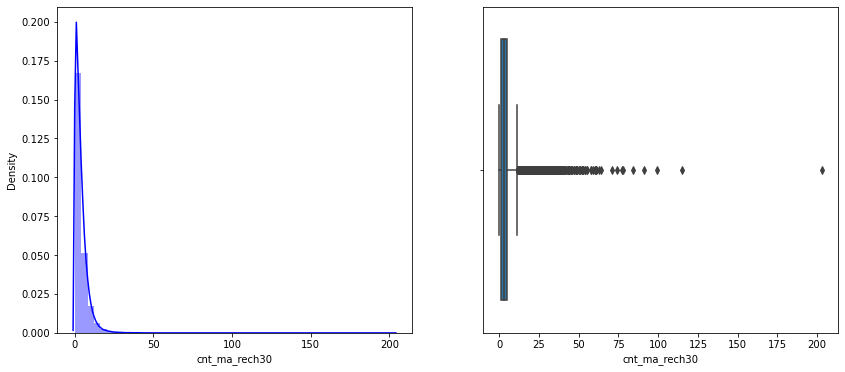

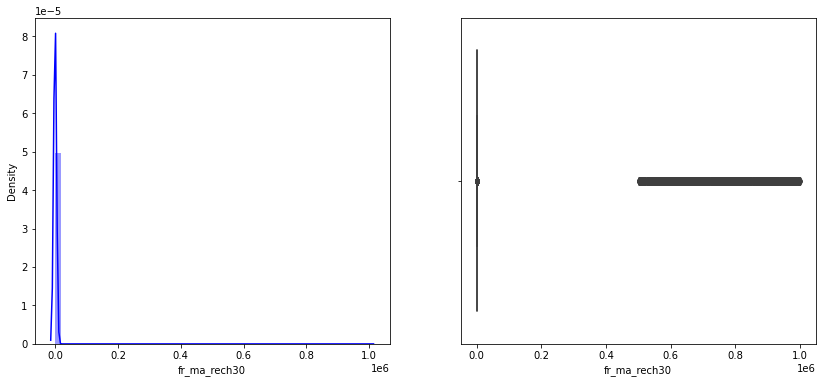

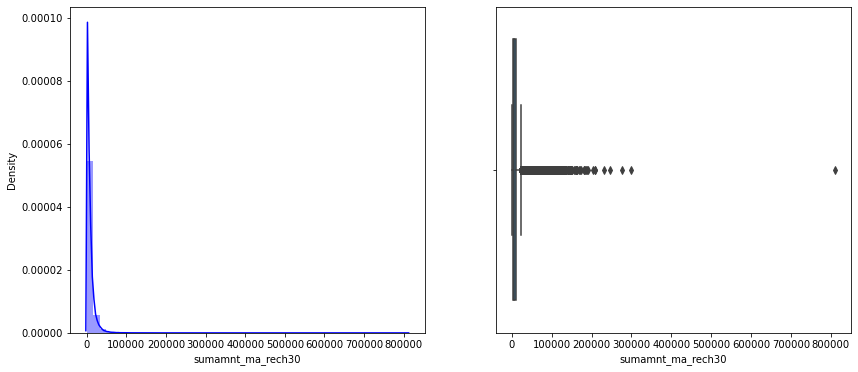

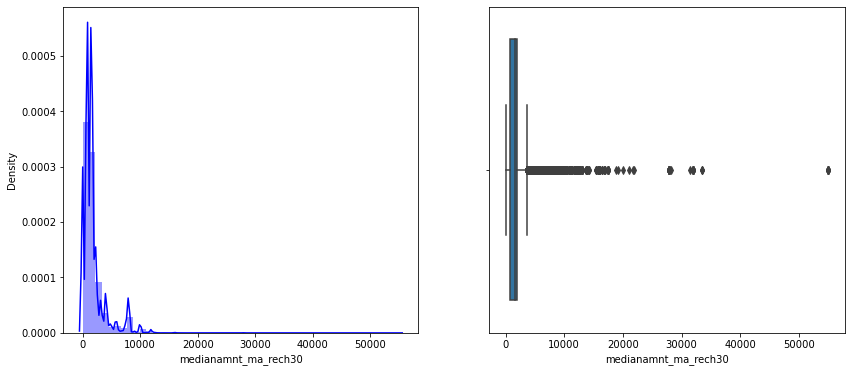

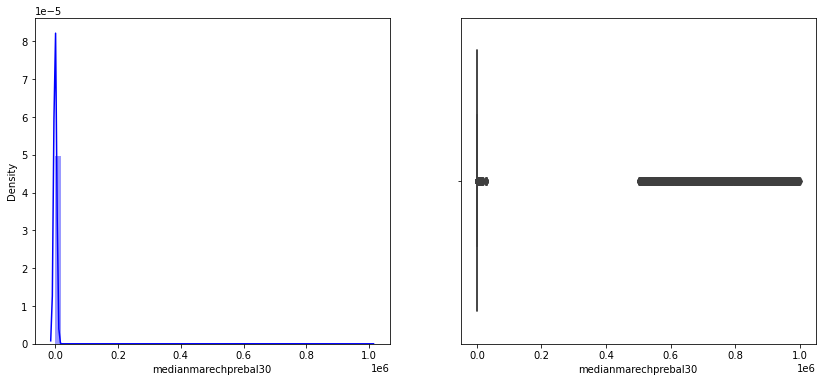

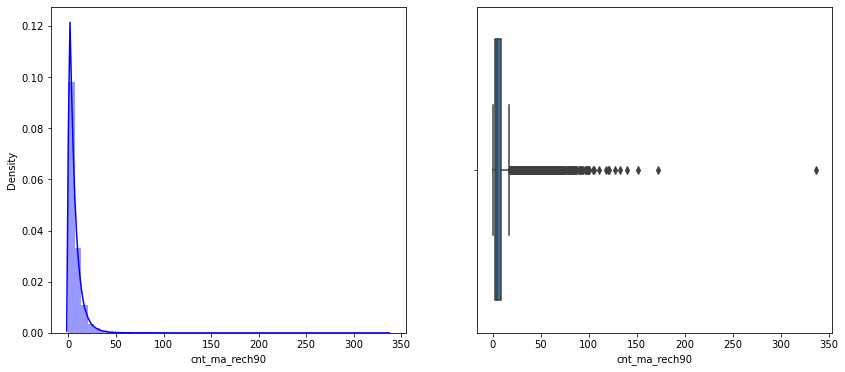

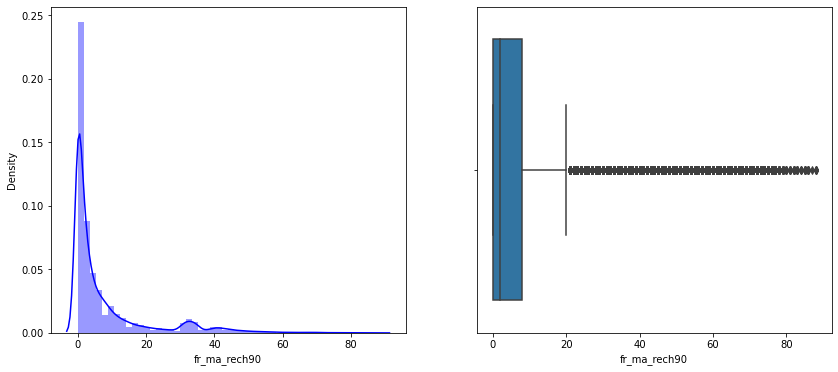

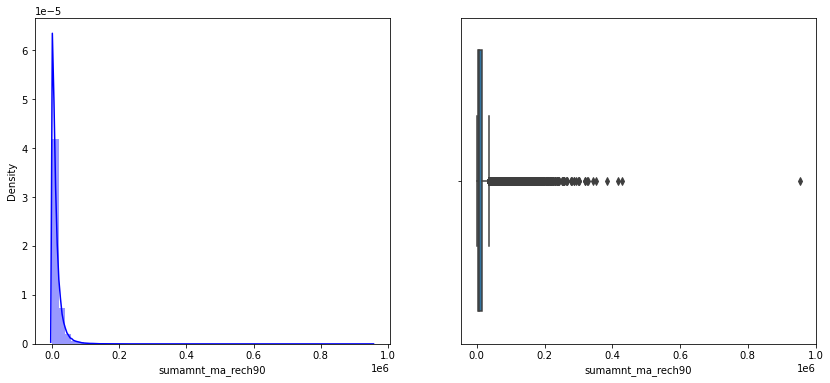

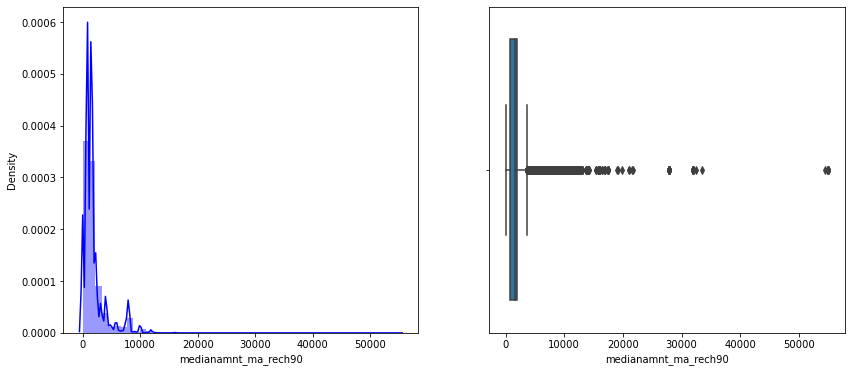

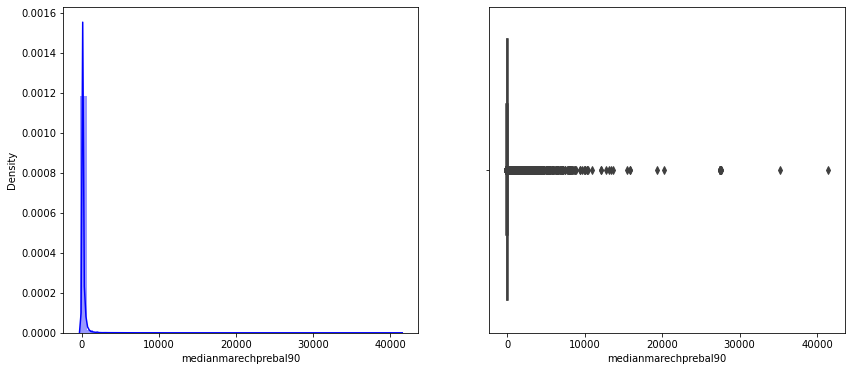

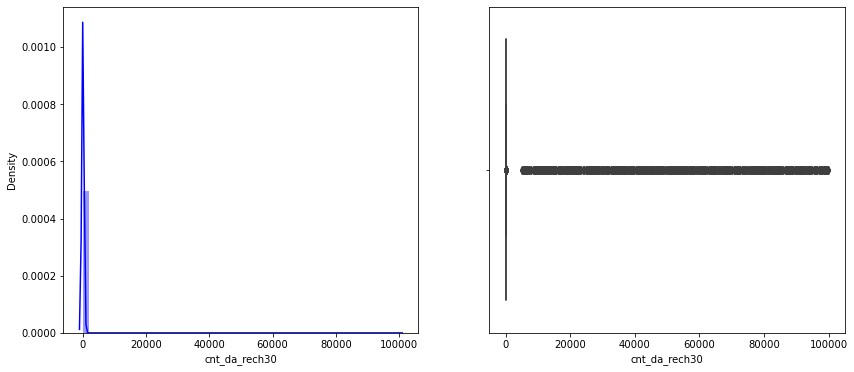

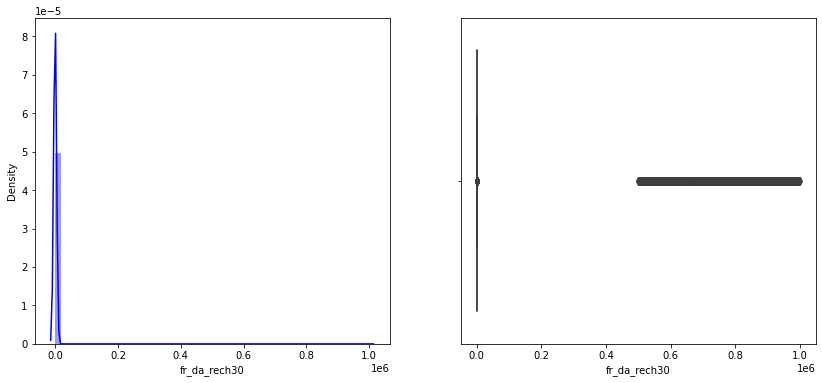

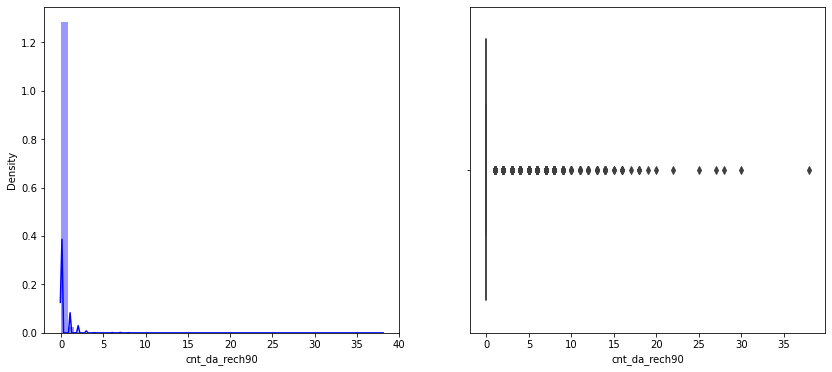

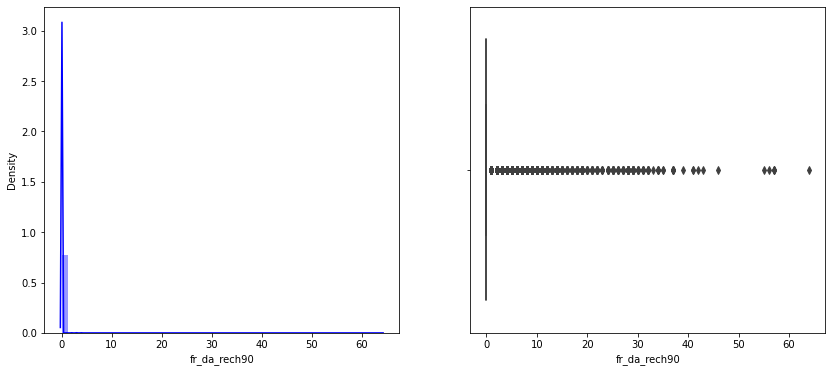

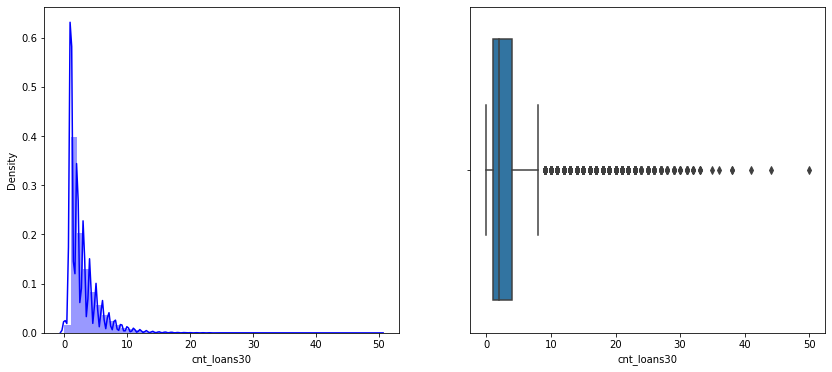

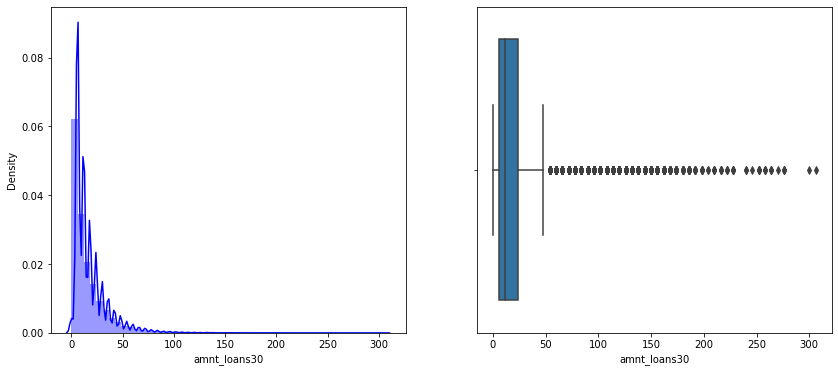

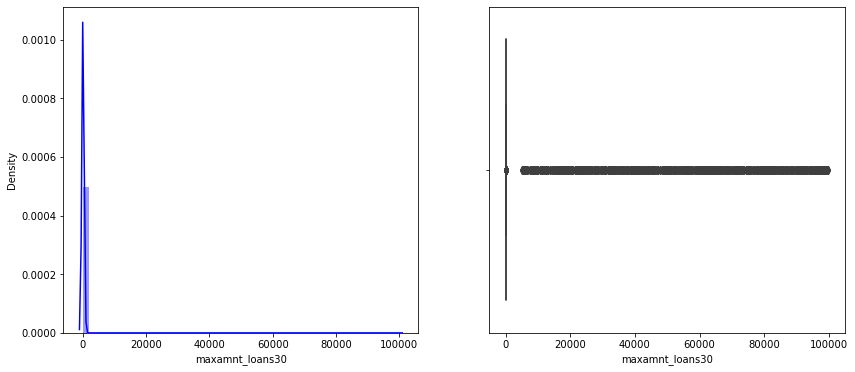

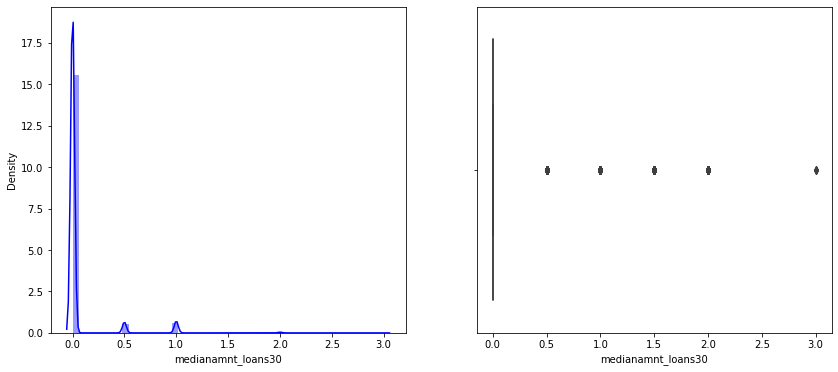

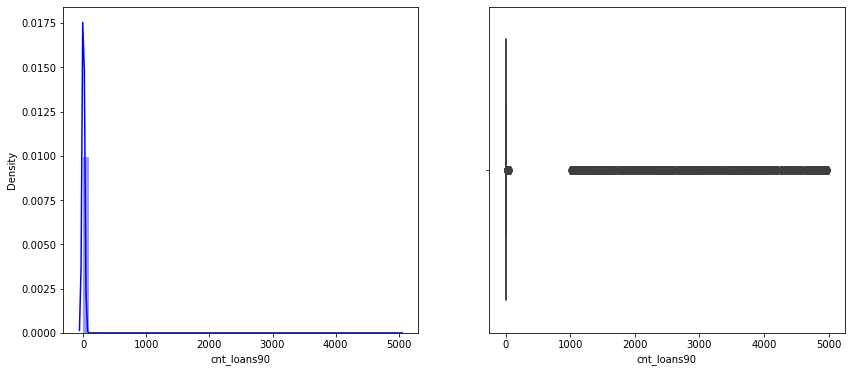

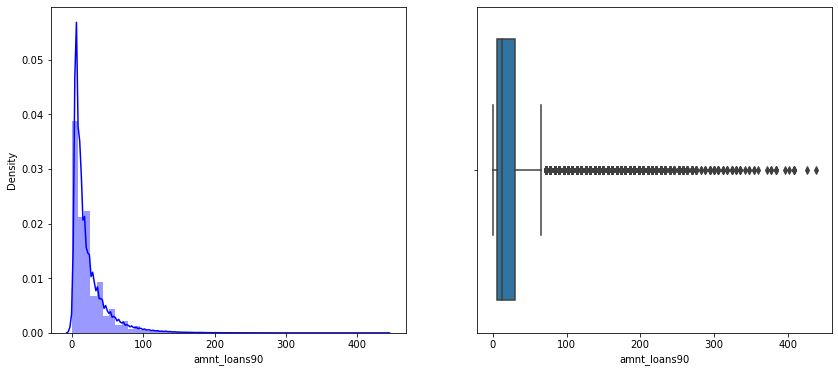

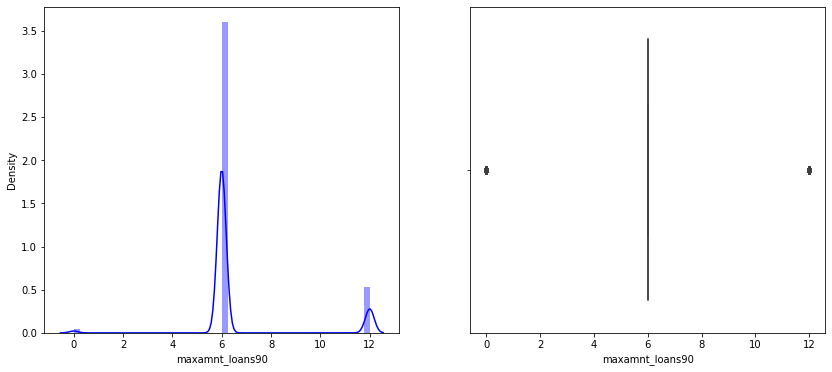

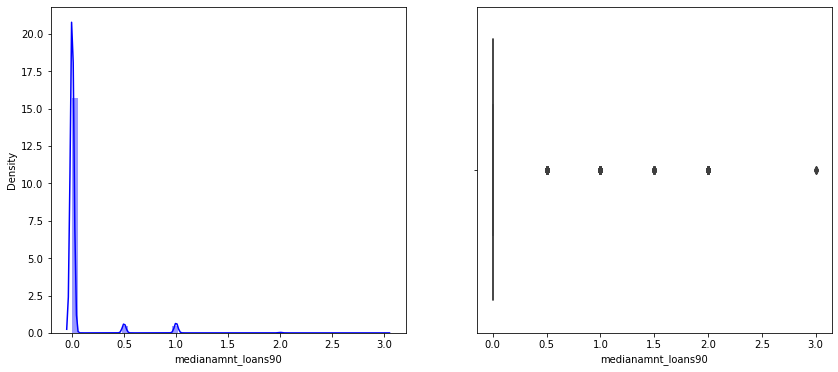

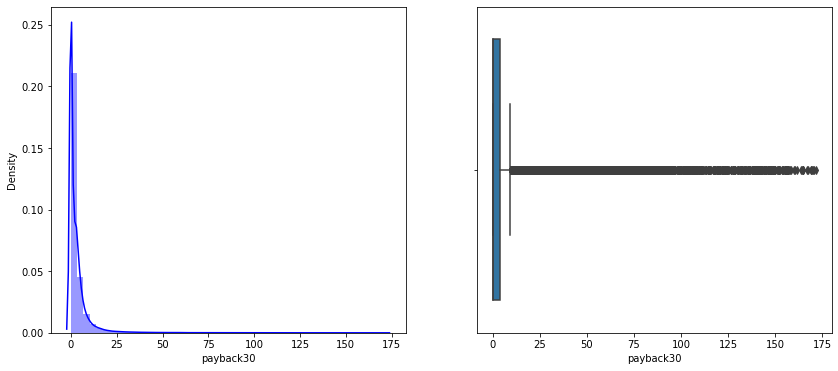

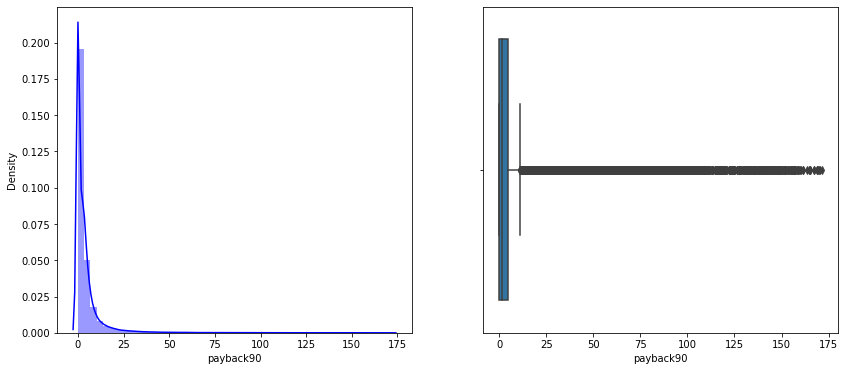

In [13]:
for i in df.columns:
    graph(df,i)

### There are outliers present in all the attributes as per the graph. Let us deal with outliers first.

IQR = Q3-Q1

high = Q3+(1.5*IQR)

low = Q1-(1.5*IQR)

### Following attributes in the list are having extreme outliers let us treat them with below technique.
### Values more than high and less than low are specified as outliers.
### We will replace the higher outlier values with upper boundary, and lower outlier values with lowr boundary.

In [15]:
columns = [ 'aon', 'daily_decr30', 'daily_decr90','rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da','last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30','sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30','cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90','medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30','fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30','amnt_loans30', 'cnt_loans90','amnt_loans90', 'payback30','payback90']
for i in columns: 
    iqr = df[i].quantile(0.75)-df[i].quantile(0.25)
    high = df[i].quantile(0.75)+(iqr*1.25)
    low  = df[i].quantile(0.25)-(iqr*1.25)
    df.loc[df[i]>high,i]=high
    df.loc[df[i]<low,i]=low         

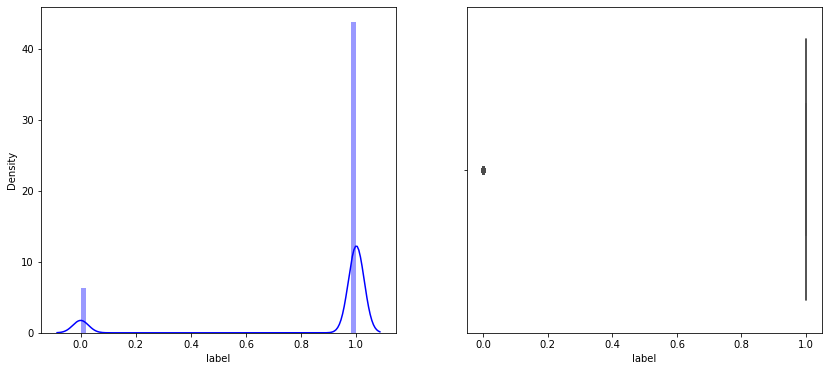

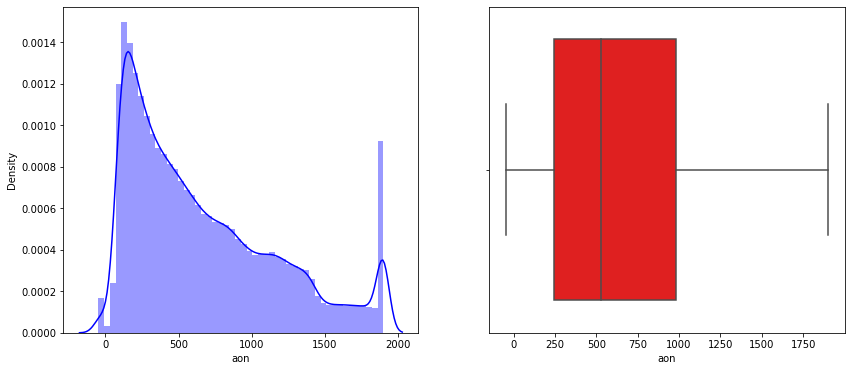

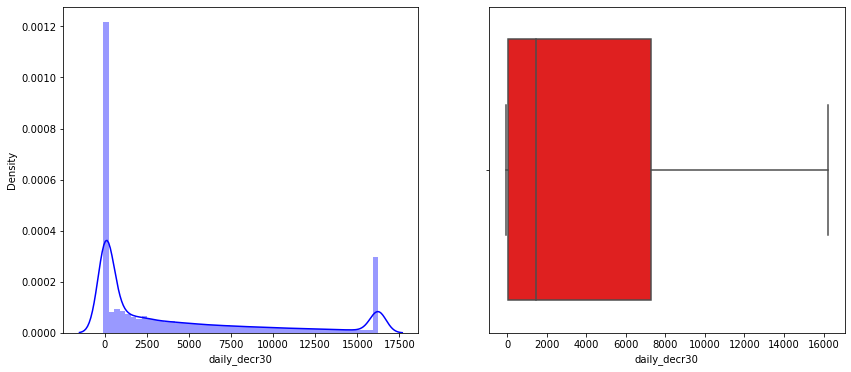

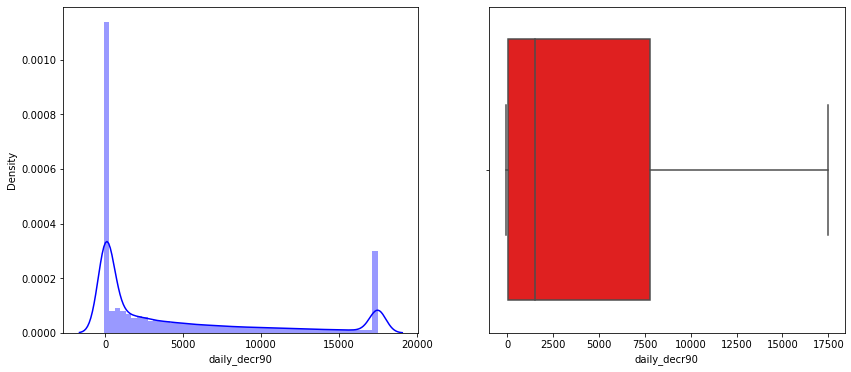

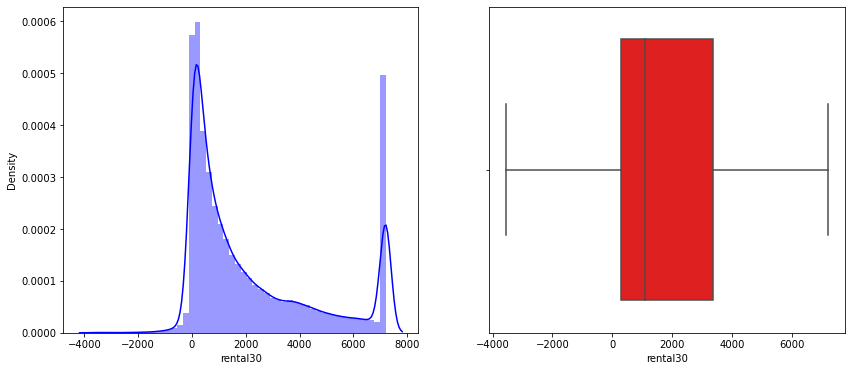

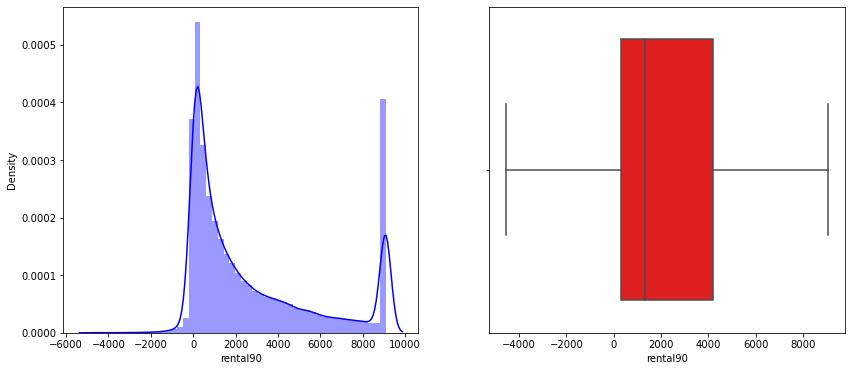

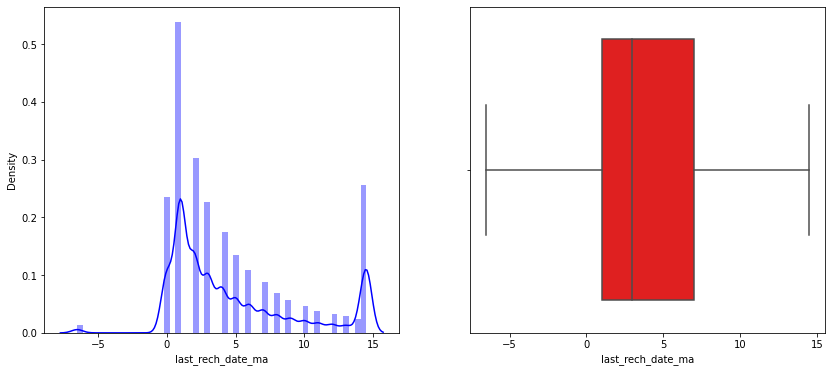

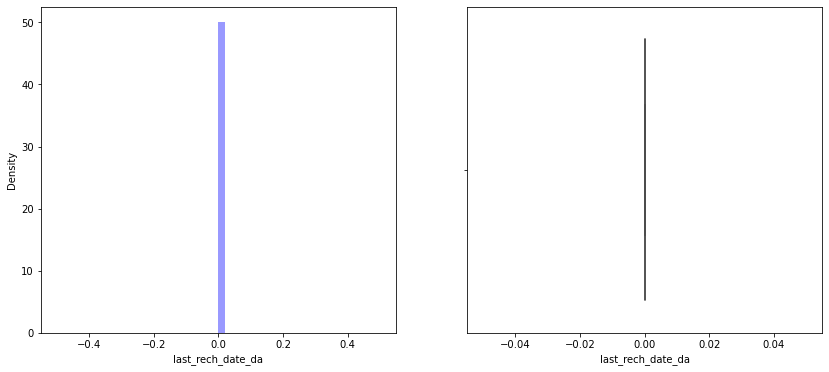

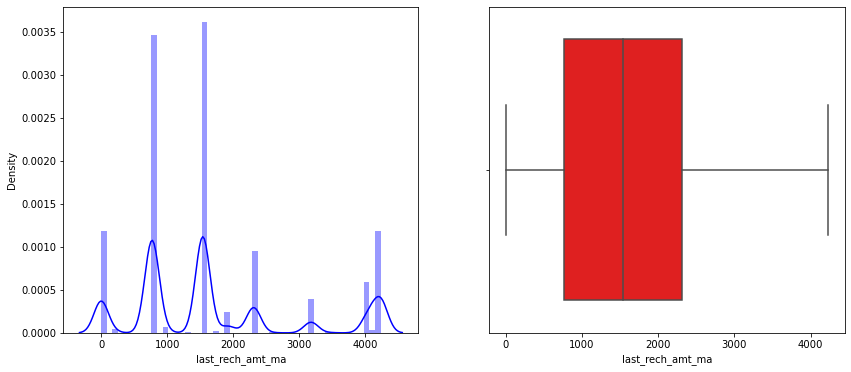

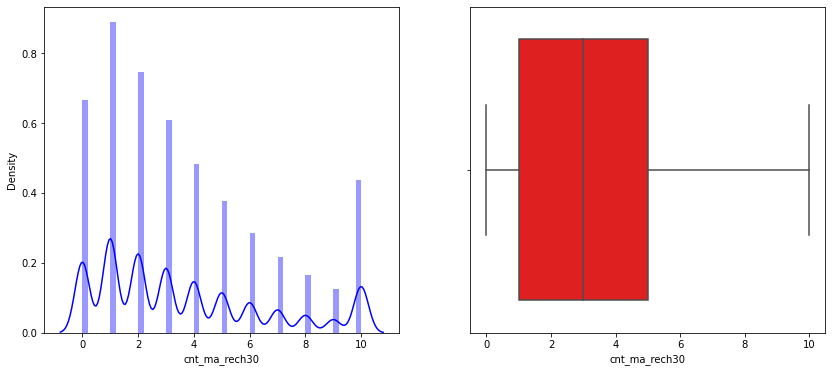

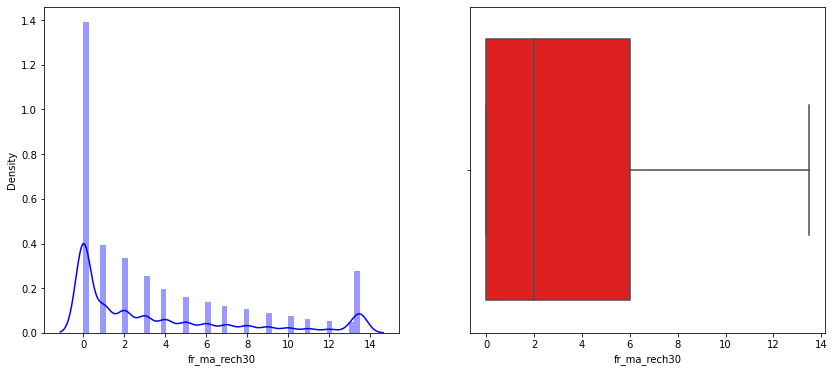

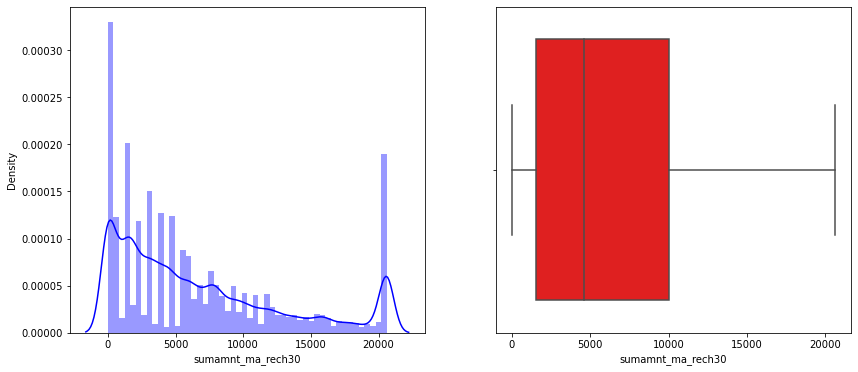

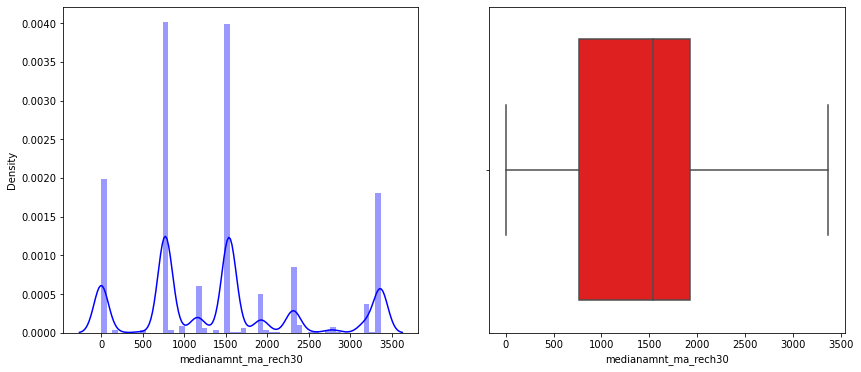

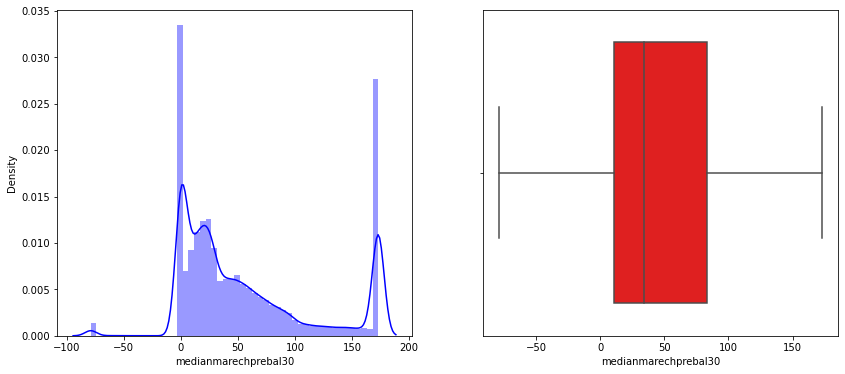

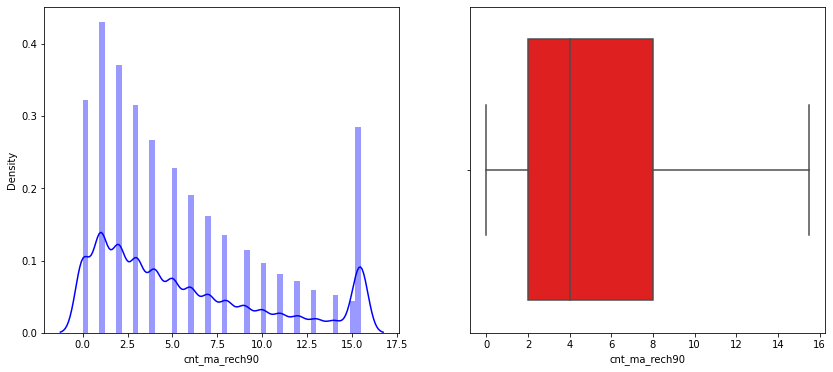

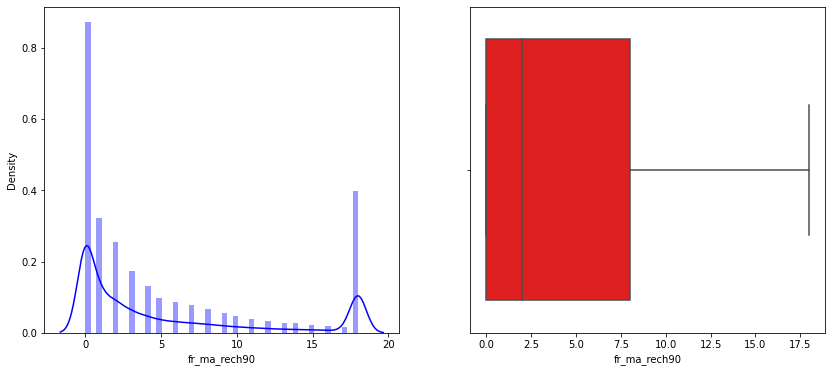

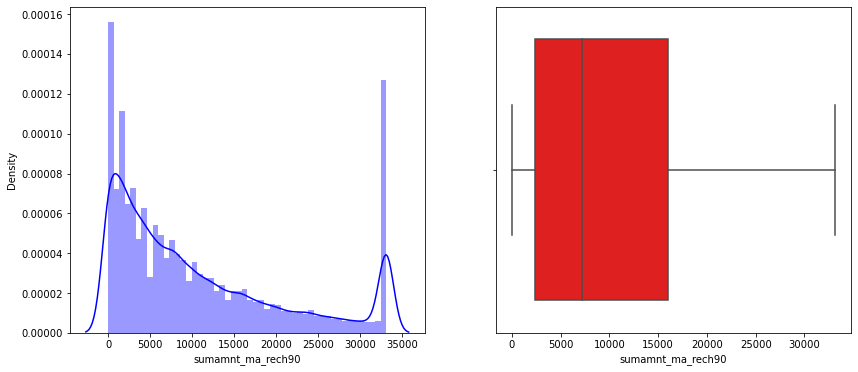

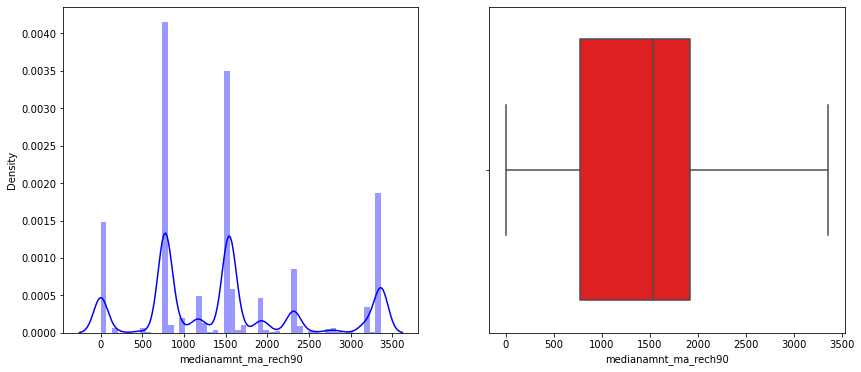

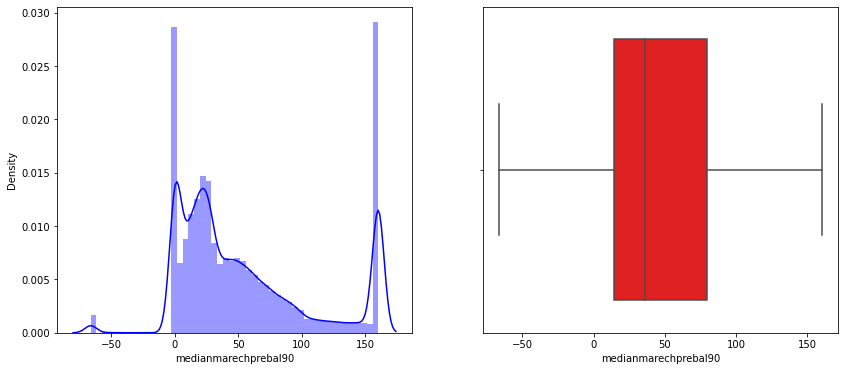

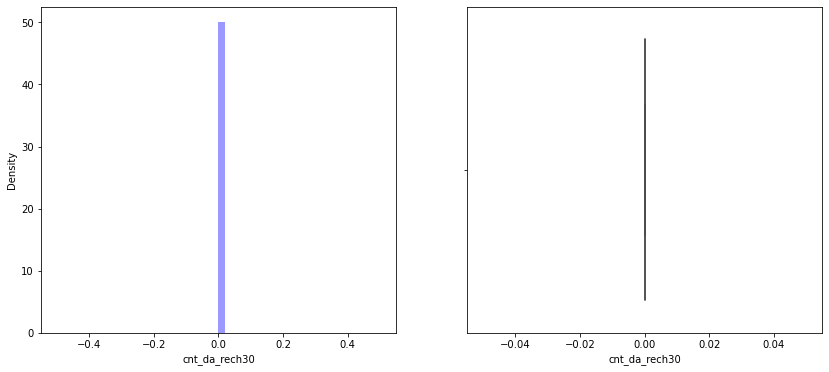

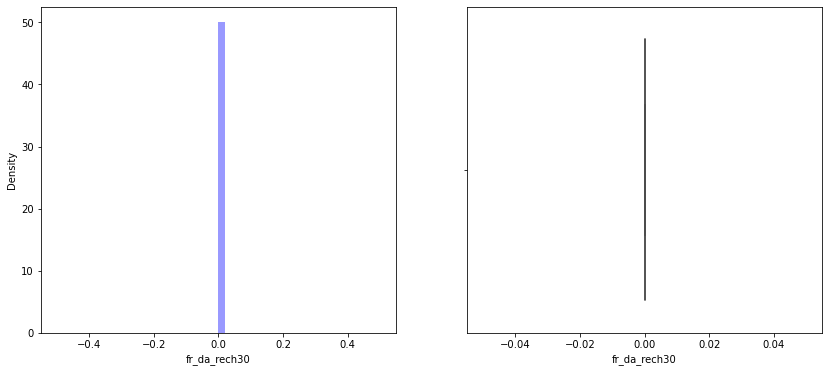

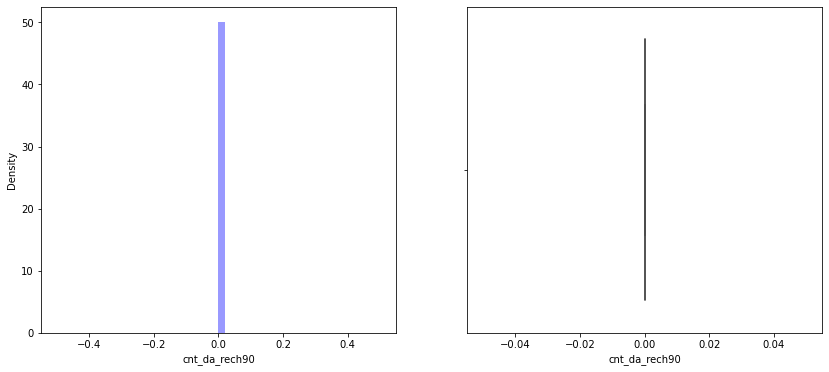

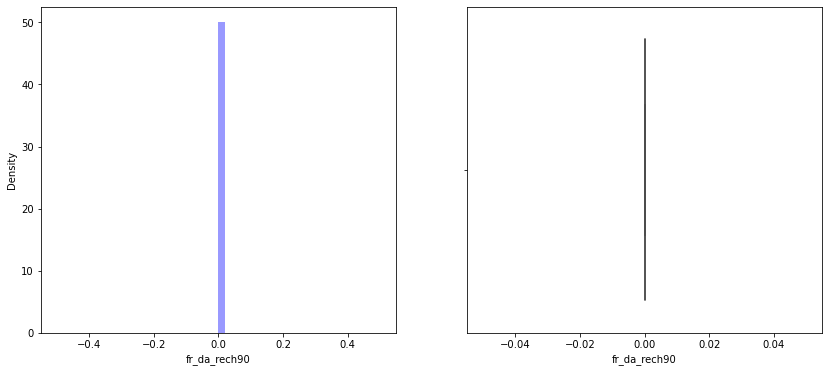

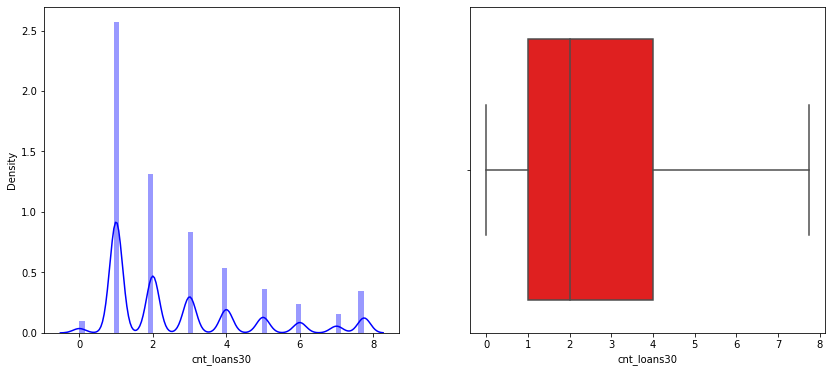

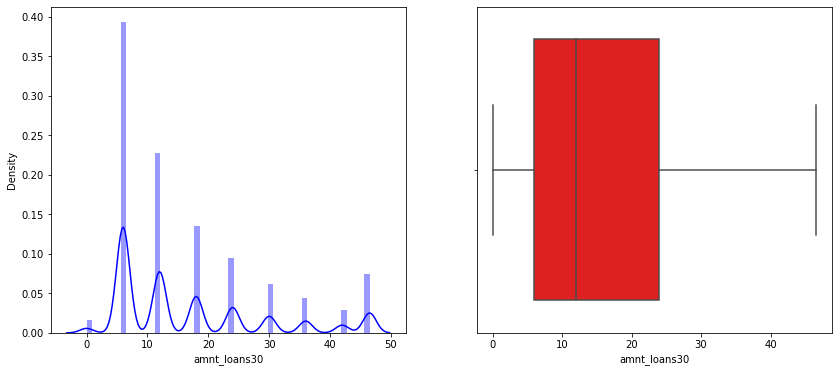

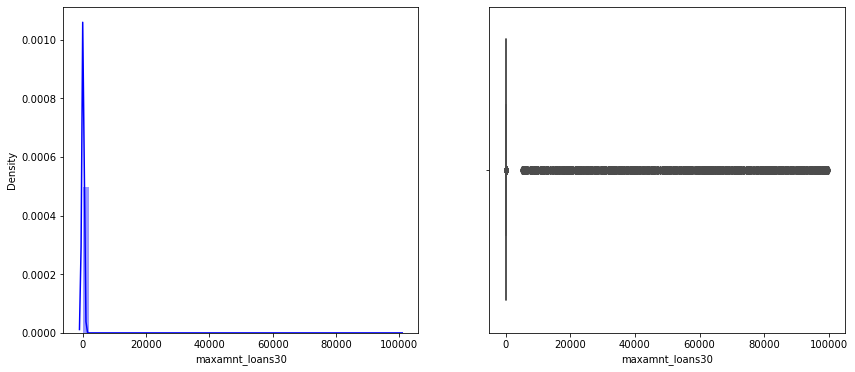

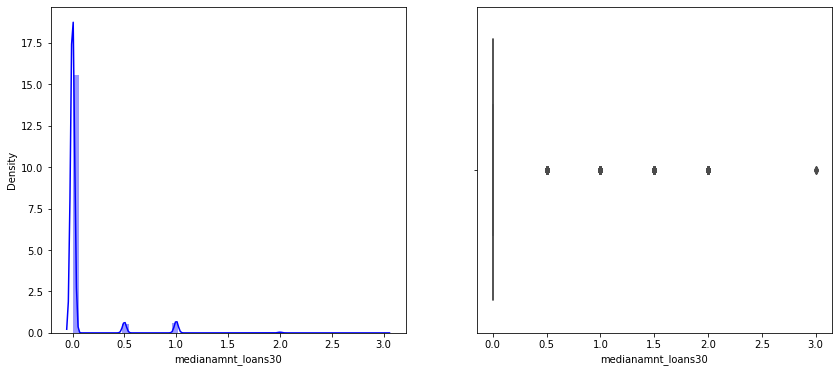

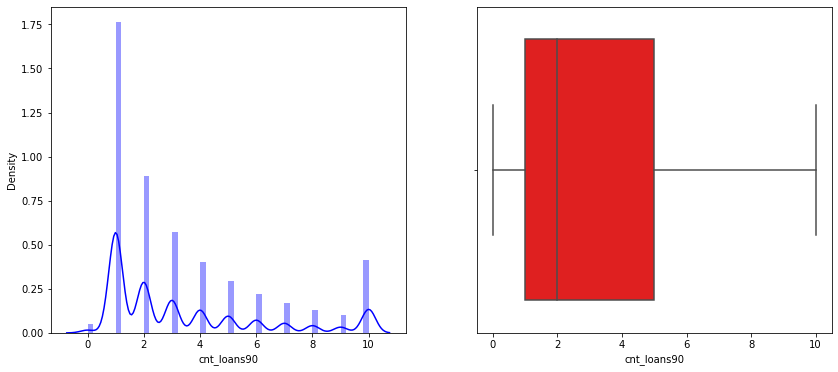

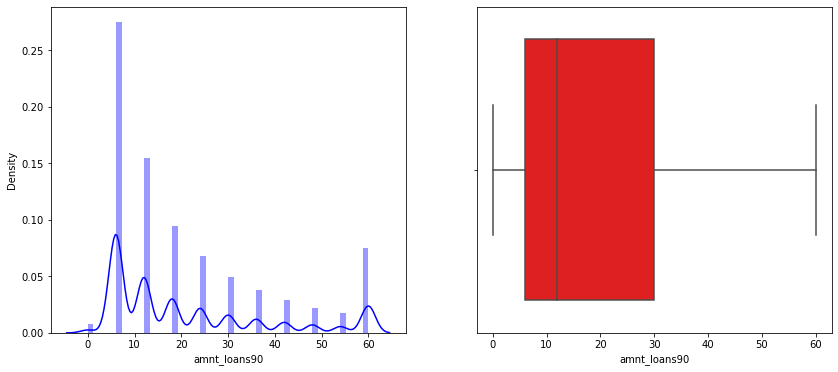

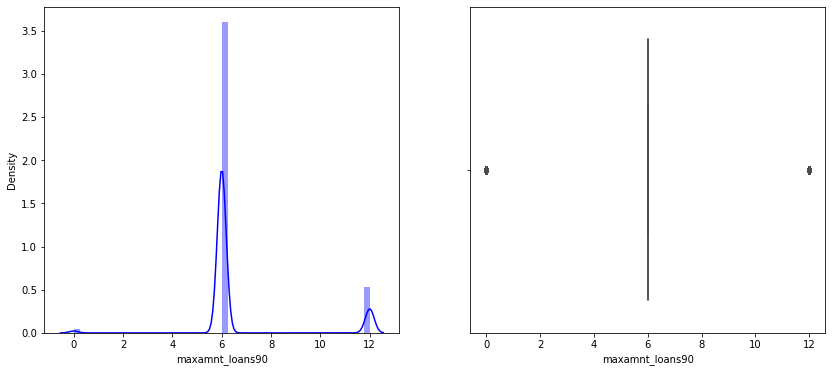

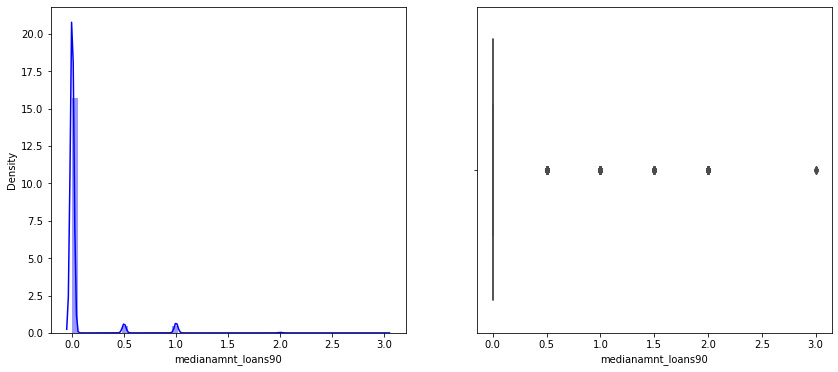

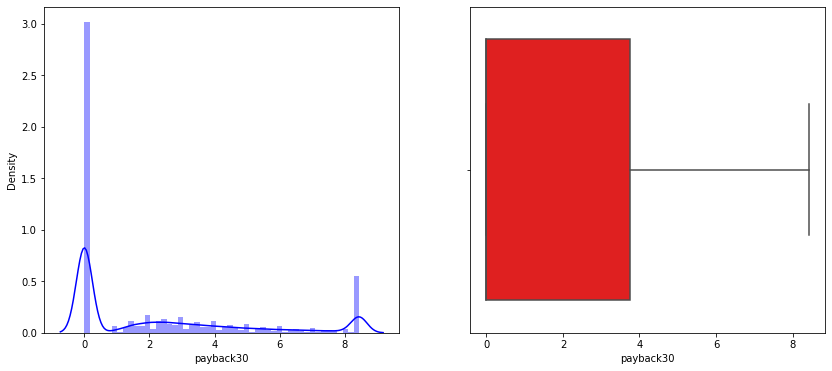

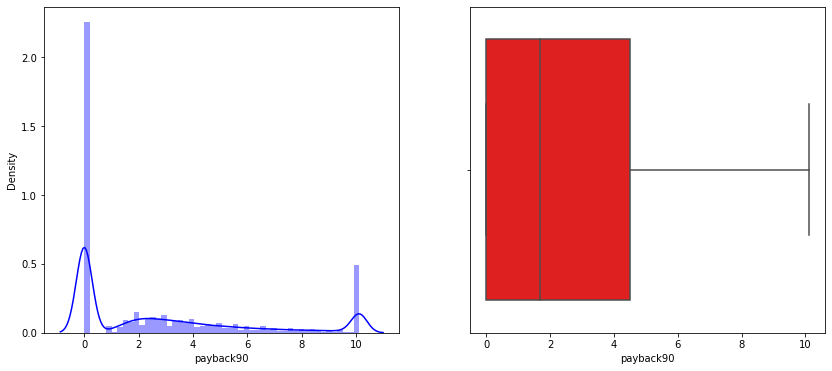

In [16]:
#cheking the attributes after removing outliers
for i in df.columns:
    graph(df,i)

In [17]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,209593.0,0.875177,0.330519,0.000000,1.000,1.000000,1.00,1.000000
aon,209593.0,664.022978,502.767129,-48.000000,246.000,527.000000,982.00,1902.000000
daily_decr30,209593.0,4314.082641,5514.690048,-93.012667,42.440,1469.175667,7244.00,16245.950000
daily_decr90,209593.0,4672.122961,6036.477134,-93.012667,42.692,1500.000000,7802.79,17502.912500
rental30,209593.0,2124.120135,2392.268994,-3565.230000,280.420,1083.570000,3356.94,7202.590000
rental90,209593.0,2672.397339,3040.714660,-4576.652500,300.260,1334.000000,4201.79,9078.702500
last_rech_date_ma,209593.0,4.694458,4.724986,-6.500000,1.000,3.000000,7.00,14.500000
last_rech_date_da,209593.0,0.000000,0.000000,0.000000,0.000,0.000000,0.00,0.000000
last_rech_amt_ma,209593.0,1680.788093,1265.877121,0.000000,770.000,1539.000000,2309.00,4232.750000
cnt_ma_rech30,209593.0,3.614777,3.049253,0.000000,1.000,3.000000,5.00,10.000000


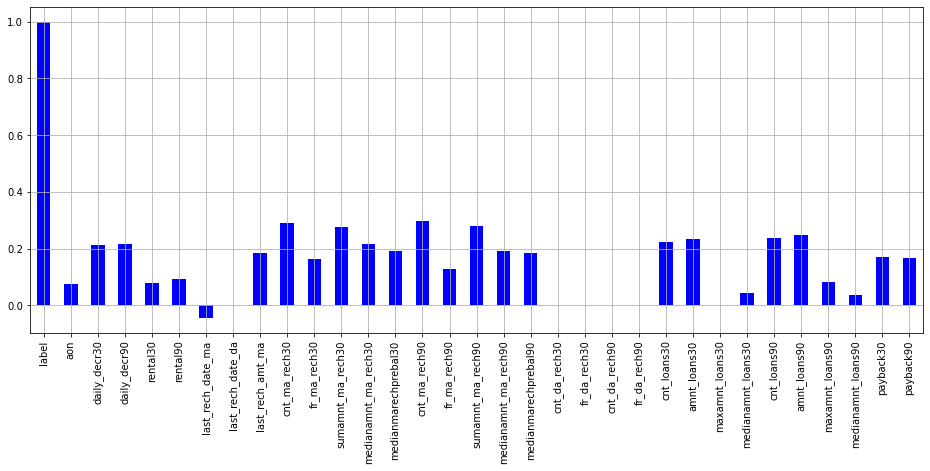

In [19]:
#checking the correlation between attributes and target variable

df.corrwith(df['label']).plot(kind='bar',grid = True, figsize=(16,6), color='blue')
plt.show()

In [20]:
#cheking the skewness present in the dataset
df.skew()

label                   -2.270254
aon                      0.859469
daily_decr30             1.128563
daily_decr90             1.132084
rental30                 1.077084
rental90                 1.078299
last_rech_date_ma        0.944700
last_rech_date_da        0.000000
last_rech_amt_ma         0.881053
cnt_ma_rech30            0.774796
fr_ma_rech30             1.133385
sumamnt_ma_rech30        0.946429
medianamnt_ma_rech30     0.569947
medianmarechprebal30     0.899169
cnt_ma_rech90            0.810947
fr_ma_rech90             1.070414
sumamnt_ma_rech90        0.997038
medianamnt_ma_rech90     0.604827
medianmarechprebal90     0.864082
cnt_da_rech30            0.000000
fr_da_rech30             0.000000
cnt_da_rech90            0.000000
fr_da_rech90             0.000000
cnt_loans30              1.211929
amnt_loans30             1.102369
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90              1.154202
amnt_loans90             1.091910
maxamnt_loans9

### There is no much skewness present in the data after removal  of outliers, as all the values are less than 10. There is only 1 value 'maxamnt_loans30' with higher value, we can remove this attribute.

### Let us confirm the inference which we have made checking correlation using Heatmap.

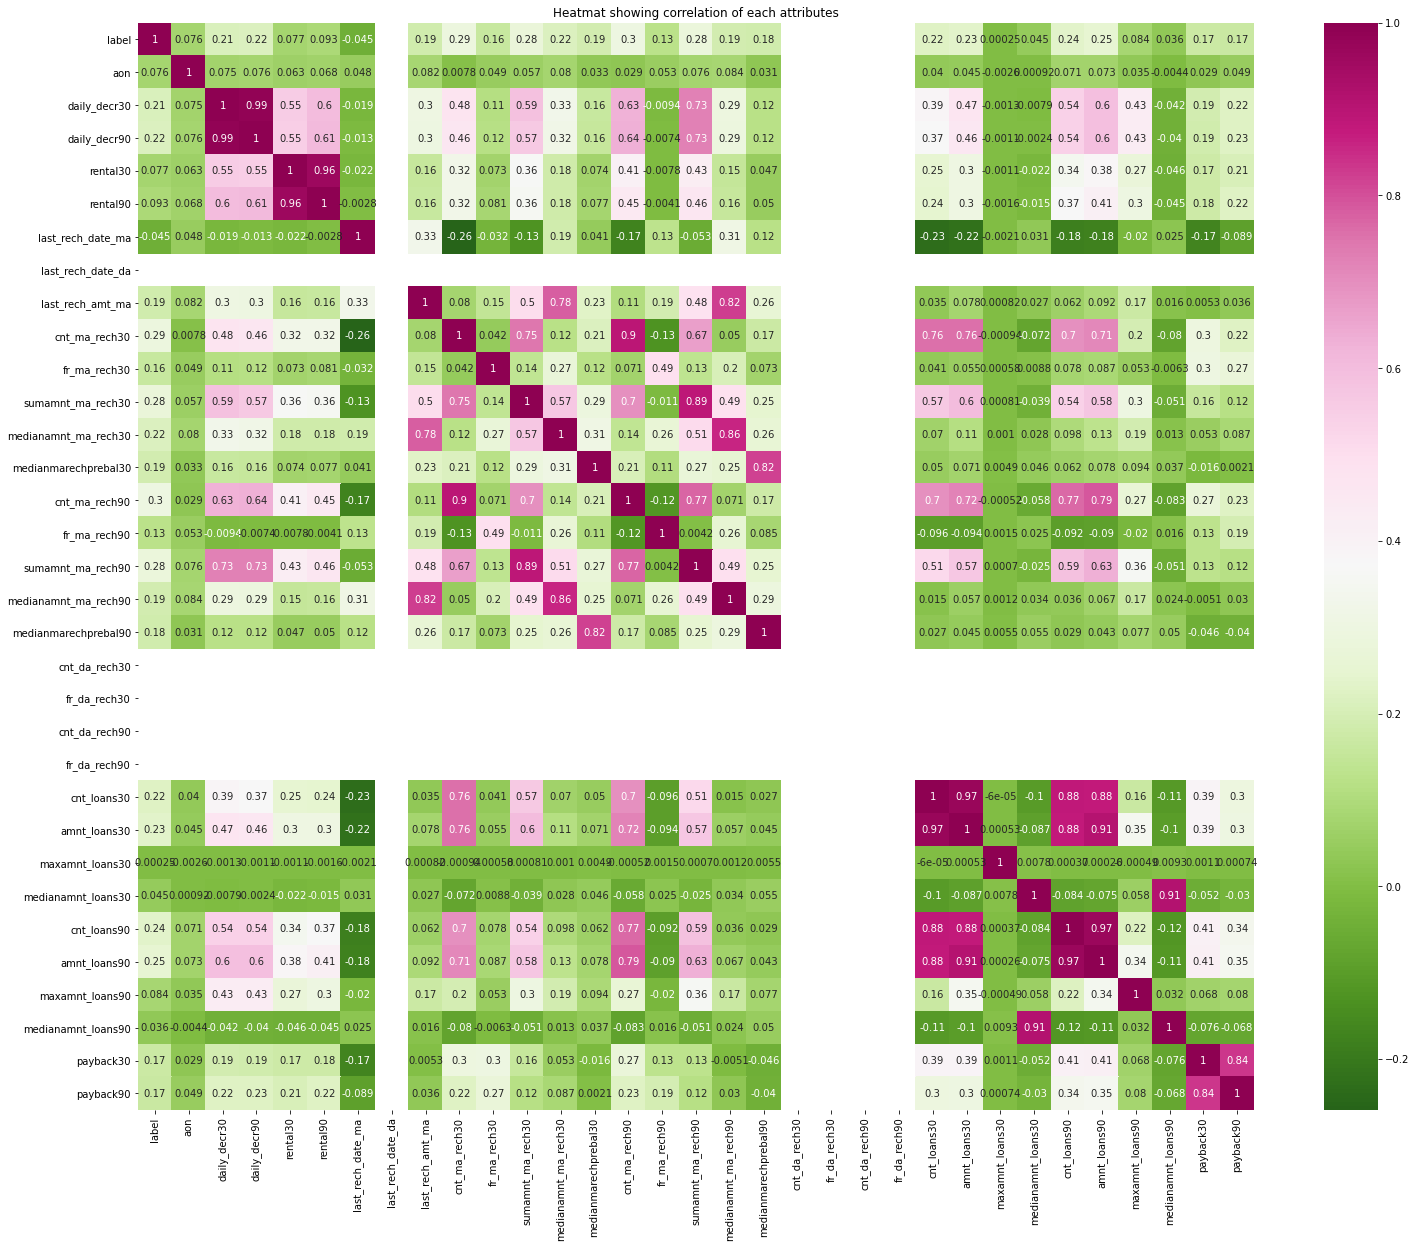

In [21]:
corr = df.corr()
plt.figure(figsize=(25,20), facecolor='white')
sns.heatmap(corr, annot=True, cmap='PiYG_r')
plt.title('Heatmat showing correlation of each attributes')
plt.show()

## Observations:
1. We can see that there is reduction in outliers. 
2. We can see some of features like 'fr_da_rech30','fr_da_rech90','last_rech_date_da','medianmarechprebal30' have nearly zero correlation with target variable.
3. 'cnt_da_rech30','cnt_loans90','fr_da_rech90','medianmarechprebal90' also have very high skewness in the data
4. From the heatmap we observe that, 'amnt_loans30'&'cnt_loans90', 'daily_decr30 & daily_decr90'  have strong correlation. We can remove one of the attributes to reduce multicollinearity.
5. 'cnt_da_rech30','cnt_da_rech90','fr_da_rech30','fr_da_rech90','last_rech_date_da','medianamnt_loans90' attribute values got reduced to zero. 
6. We can understand that these values have less importance towards the model inference. Let us proceed by dropping these columns from the dataset.
 

## Let us proceed by dropping some of mentioned columns.

In [5]:
df.drop(columns=['cnt_da_rech30','cnt_da_rech90','fr_da_rech30','fr_da_rech90','last_rech_date_da','maxamnt_loans30'], inplace=True, axis=1)

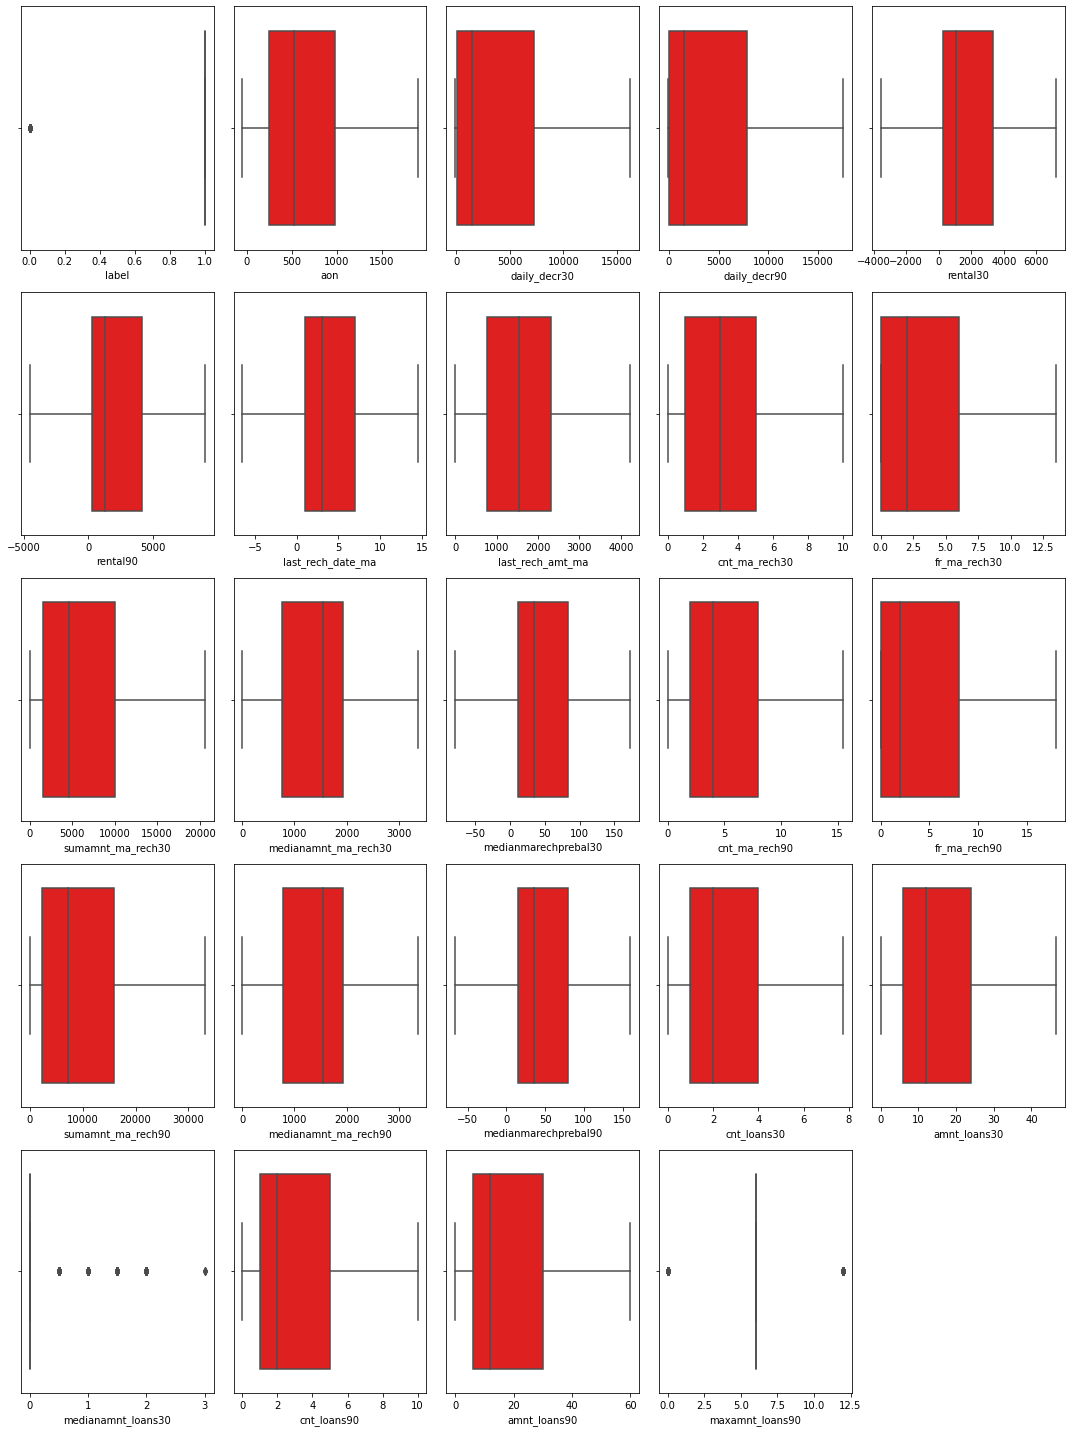

In [26]:
#cheking the outliers in the datasets

plt.figure(figsize=(15,20))
graph = 1
for col in df:
    if graph<25:
        ax = plt.subplot(5,5,graph)
        sns.boxplot(df[col], orient='v', color='red')
        plt.xlabel(col, fontsize=10)
    graph+=1
plt.tight_layout()

In [27]:
df.skew()

label                  -2.270254
aon                     0.859469
daily_decr30            1.128563
daily_decr90            1.132084
rental30                1.077084
rental90                1.078299
last_rech_date_ma       0.944700
last_rech_amt_ma        0.881053
cnt_ma_rech30           0.774796
fr_ma_rech30            1.133385
sumamnt_ma_rech30       0.946429
medianamnt_ma_rech30    0.569947
medianmarechprebal30    0.899169
cnt_ma_rech90           0.810947
fr_ma_rech90            1.070414
sumamnt_ma_rech90       0.997038
medianamnt_ma_rech90    0.604827
medianmarechprebal90    0.864082
cnt_loans30             1.211929
amnt_loans30            1.102369
medianamnt_loans30      4.551043
cnt_loans90             1.154202
amnt_loans90            1.091910
maxamnt_loans90         1.678304
medianamnt_loans90      4.895720
payback30               1.064092
payback90               1.040428
dtype: float64

In [6]:
df.shape

(209593, 27)

In [ ]:
#Visualizing all the attributes relationship with each other using multivariate analysis technique.
plt.figure(figsize=(20,20), facecolor='white')
sns.pairplot(df, hue = 'label')
plt.title('Relationship of attributes to target')
plt.show()

## Model Building

#### After applying all the techniques we see that the data donot contains outliers, data is not multicollinear or correlated and it is good enough to proceed with model building,

Let us seperate the independent and dependent variables.

In [7]:
X = df.drop('label',axis=1)
y = df['label']

Before sampling 
 (209593, 26)
Before sampling 
 1    183431
0     26162
Name: label, dtype: int64
After sampling 
 (366862, 26)
After sampling 
 0    183431
1    183431
Name: label, dtype: int64


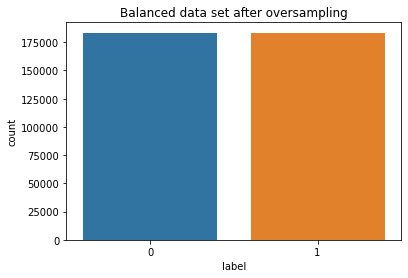

In [8]:
# Using RandomOverSampling Analysis to balance the datasets

print('Before sampling \n',X.shape)
print('Before sampling \n',y.value_counts())

ran_samp = RandomOverSampler()
X, y  = ran_samp.fit_resample(X,y)

print('After sampling \n',X.shape)
print('After sampling \n',y.value_counts()) 

plt.figure(figsize=(6,4))
sns.countplot(y)
plt.title('Balanced data set after oversampling')
plt.show()

## Let us proceed with Data standardization,
1. It makes the data is internally consistent; that is, each data type has the same content and format. 
2. Standardized values are useful for tracking data that isn't easy to compare otherwise

In [9]:
scalar = StandardScaler()
X_scaler = scalar.fit_transform(X)

### Let us proceed with, 
1. Split the dataset into two pieces: a training set and a testing set.
2. Train the model on the training set.
3. Test the model on the testing set, and evaluate how well our model did.

#### Let us select the best Random state which provides best accuracy for the selected model

In [32]:
max_ac =0
maxRS=0

for i in range(2,200):
    X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, random_state=i, test_size=0.25)
    model = LogisticRegression()
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    if acc> max_ac:
        max_ac=acc
        maxRS=i
        
print("The max accuracy obtained is {} for the Random State {}".format(max_ac, maxRS))

The max accuracy obtained is 0.7761023158445637 for the Random State 52


In [11]:
#splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X_scaler, y, random_state=52, test_size=0.25)

## 1. Logistic Regression

*******************RESULTS*******************
The accuracy score of train is : 75.61403763819936
The accuracy score test is : 75.74578045270182
The cross validation score is : 75.59986399651228
Confusion Matrix: 
 [[37239  8353]
 [13892 32232]]
Classification 
               precision    recall  f1-score   support

           0       0.73      0.82      0.77     45592
           1       0.79      0.70      0.74     46124

    accuracy                           0.76     91716
   macro avg       0.76      0.76      0.76     91716
weighted avg       0.76      0.76      0.76     91716

***********************************************


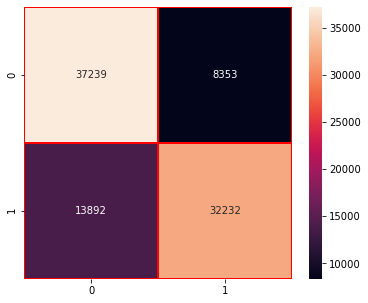

In [14]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_train = log_reg.predict(X_train)
y_pred = log_reg.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(log_reg,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification \n", classification_report(y_test, y_pred))
print("***********************************************")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()

## 2. Random Forest Classifier

*******************RESULTS*******************
The accuracy score of train is : 99.97419551801589
The accuracy score test is : 97.77029089798944
The cross validation score is : 96.99868459492029
Confusion Matrix: 
 [[45505    87]
 [ 1958 44166]]
Classification
                precision    recall  f1-score   support

           0       0.96      1.00      0.98     45592
           1       1.00      0.96      0.98     46124

    accuracy                           0.98     91716
   macro avg       0.98      0.98      0.98     91716
weighted avg       0.98      0.98      0.98     91716

***********************************************


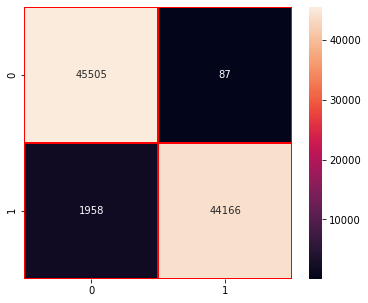

In [15]:
ran_clf = RandomForestClassifier()
ran_clf.fit(X_train, y_train)
y_pred_train = ran_clf.predict(X_train)
y_pred = ran_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(ran_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification\n ", classification_report(y_test, y_pred))
print("***********************************************")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)

plt.show()

## 3. Decision Tree Classifier

*******************RESULTS*******************
The accuracy score of train is : 99.97492240483234
The accuracy score test  is : 95.44899472284007
The cross validation score is : 94.31974294082005
Confusion Matrix: 
 [[45504    88]
 [ 4086 42038]]
Classification 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     45592
           1       1.00      0.91      0.95     46124

    accuracy                           0.95     91716
   macro avg       0.96      0.95      0.95     91716
weighted avg       0.96      0.95      0.95     91716

***********************************************


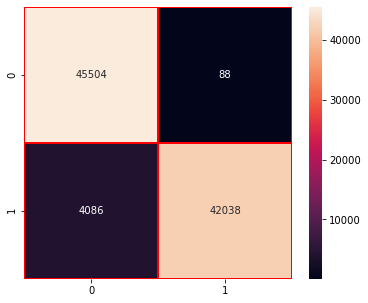

In [16]:
dec_clf = DecisionTreeClassifier()
dec_clf.fit(X_train, y_train)
y_pred_train = dec_clf.predict(X_train)
y_pred = dec_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test  is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(dec_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification \n", classification_report(y_test, y_pred))
print("***********************************************")

plt.figure(figsize=(6,5)) 
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()

## 4. XGBoost Classifier

[11:59:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
*******************RESULTS*******************
The accuracy score of train is : 86.11464458869109
The accuracy score test is : 85.54450695625627
[11:59:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:59:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'loglos

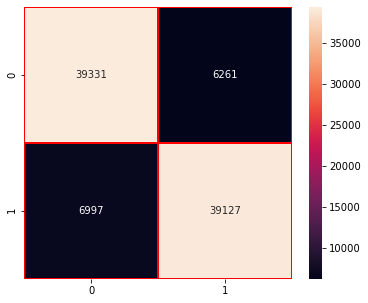

In [17]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
y_pred_train = xgb_clf.predict(X_train)
y_pred = xgb_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(xgb_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification \n ", classification_report(y_test, y_pred))
print("***********************************************")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()

## 5. K-Neighbours Classifier

*******************RESULTS*******************
The accuracy score of train is : 91.09236550776679
The accuracy score test is : 87.4634742029744
The cross validation score is : 85.1700548146046
Confusion Matrix: 
 [[44293  1299]
 [10199 35925]]
Classification                precision    recall  f1-score   support

           0       0.81      0.97      0.89     45592
           1       0.97      0.78      0.86     46124

    accuracy                           0.87     91716
   macro avg       0.89      0.88      0.87     91716
weighted avg       0.89      0.87      0.87     91716

***********************************************


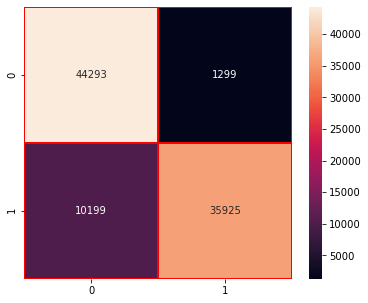

In [18]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
y_pred_train = knn_clf.predict(X_train)
y_pred = knn_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(knn_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification ", classification_report(y_test, y_pred))
print("***********************************************")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)
plt.show()

## Observation:
We have trained several models above for the dataset we had prepared and we got different results for different alogorithm, 
1. Logistic regression model gave us 75.7% of accuracy and  cross validation score of 75.6 % for the test model which is very near and also the pricission, accuracy score are also high
2. Random Forest classifier model gave us 97.7% accuracy and 96.99% of cross validation score and also metric values are near to    1 which is very good score.
3. Decision tree classifier model gave us accuracy and cv score of 95.5% and 94.3 %. and metric values are near to 1.
4. XGboost classifier has given us 85.9% and 85.3% of accuracy and cv score for the test dataset. 
5. KNN classifier has given us 87.4% and 85.17% of accuracy and cv score for the test dataset. (This model has taken 3 hours to train on the dataset)


#### All of the above models have given us the best results for the model prepared, let us check if we can improvise our model performance to 100% accuracy.

## Hyperparameter Optimization:
#### We are selecting random forest classifier model to increase the accuracy using Gridsearch CV method.

In [12]:
parameters = {"n_estimators":[8,4,6],  
              "min_samples_leaf":[2,3,4,5,],
              "criterion":["gini","entropy"], 
              "min_samples_split":[2,4,6,8,10]}

rand_clf = GridSearchCV(RandomForestClassifier(), parameters)
#fitting train and test data
rand_clf.fit(X_train,y_train) 
  
#Best parameters
rand_clf.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 8}

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 8


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   14.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s finished


*******************RESULTS*******************
The accuracy score of train is : 99.97419551801589
The accuracy score test is : 96.17296872955646


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 8


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   10.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 8


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   10.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 8


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   11.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 8


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   11.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 8


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s


building tree 2 of 8
building tree 3 of 8
building tree 4 of 8
building tree 5 of 8
building tree 6 of 8
building tree 7 of 8
building tree 8 of 8


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   11.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s finished


The cross validation score is : 94.98011984740195
Confusion Matrix: 
 [[45213   379]
 [ 3131 42993]]
Classification
                precision    recall  f1-score   support

           0       0.94      0.99      0.96     45592
           1       0.99      0.93      0.96     46124

    accuracy                           0.96     91716
   macro avg       0.96      0.96      0.96     91716
weighted avg       0.96      0.96      0.96     91716

***********************************************


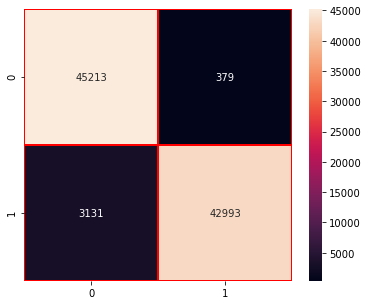

In [23]:
rand_clf = RandomForestClassifier(criterion='entropy',min_samples_leaf=2, min_samples_split=4,n_estimators=8,n_jobs=1,verbose=2)
rand_clf.fit(X_train, y_train)
y_pred_train = ran_clf.predict(X_train)
y_pred = rand_clf.predict(X_test)

print("*******************RESULTS*******************")
print("The accuracy score of train is :", accuracy_score(y_train, y_pred_train)*100)
print("The accuracy score test is :", accuracy_score(y_test, y_pred)*100)
cv_score = cross_val_score(rand_clf,X_train, y_train,cv=5)
print("The cross validation score is :", cv_score.mean()*100)

print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))
print("Classification\n ", classification_report(y_test, y_pred))
print("***********************************************")

plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="r",linewidths=1)

plt.show()

### We see that even after hyperparameter optimization, there is no much changes in the accuracy score, Hence saving the previous model for the reference.

Let us plot the Area Under Curve graph to find the best model which fits highest area in curve.

<Figure size 1080x1080 with 0 Axes>

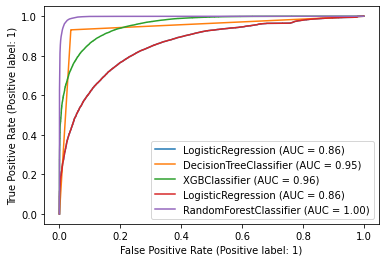

In [21]:
plt.figure(figsize=(15,15,))
graph = plot_roc_curve(log_reg,X_test, y_pred)  
plot_roc_curve(dec_clf,X_test, y_pred, ax=graph.ax_)
plot_roc_curve(xgb_clf,X_test, y_pred, ax=graph.ax_)
plot_roc_curve(log_reg,X_test, y_pred, ax=graph.ax_)
plot_roc_curve(ran_clf,X_test, y_pred, ax=graph.ax_)  
plt.show()


## Saving the best Model
We see that Random forest classifier model has given the highest AUC in graph, the accuracy score of 97% and CV score of 96% which is highest among all the models tested. also we see that evaluation metrics are high for this model.
Hence we will be saving this model.


In [ ]:
import joblib
file = "MicroCredit_Defaulter_Project.joblib"
joblib.dump(ran_clf,file)